In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

Task:
Download the covid-19 dataset from kaggle
unzip the file

In [6]:
!kaggle datasets download imdevskp/corona-virus-report

Dataset URL: https://www.kaggle.com/datasets/imdevskp/corona-virus-report
License(s): other


In [7]:
!unzip corona-virus-report.zip

Archive:  corona-virus-report.zip
  inflating: country_wise_latest.csv  
  inflating: covid_19_clean_complete.csv  
  inflating: day_wise.csv            
  inflating: full_grouped.csv        
  inflating: usa_county_wise.csv     
  inflating: worldometer_data.csv    


Let's import modules

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

modules are imported

importing "full_grouped.csv" from covid-19 file that was unzipped.

In [9]:
df = pd.read_csv('full_grouped.csv')

Explore the dataset

In [10]:
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [12]:
df.shape

(35156, 10)

In [13]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [15]:
df.drop_duplicates(inplace= True)

Drop the columns that are not needed

In [20]:
df.drop(['Active', 'New cases', 'New deaths', 'New recovered'], axis= 1, inplace= True)

Find the country with maximum deaths.

In [21]:
max_deaths = df['Deaths'].max()
df[ df['Deaths'] == max_deaths]['Country/Region']

,Country/Region
35142,US


In [22]:
import seaborn as sns

Plot WHO Region vs Deaths to visualize the data

<BarContainer object of 35156 artists>

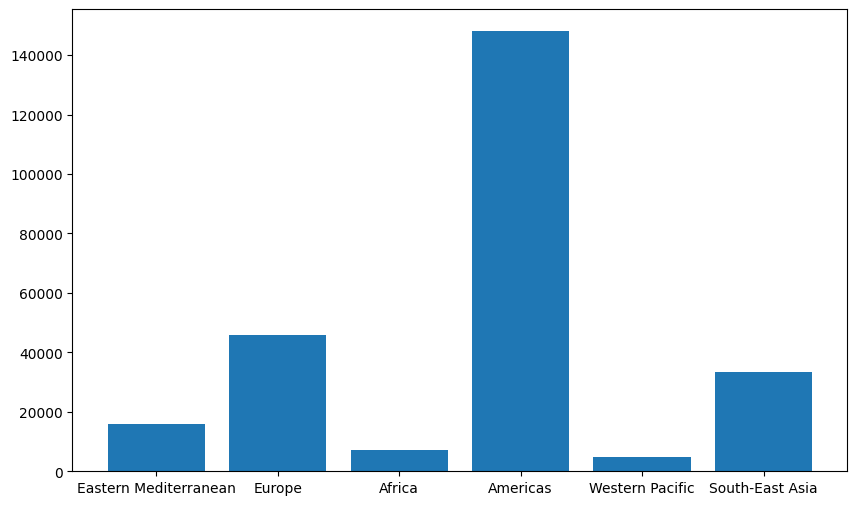

In [70]:
plt.figure(figsize= (10, 6))
plt.bar(data=df, x='WHO Region', height= 'Deaths')

More people died in Americas Region than in rest of the world during covid

In [71]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,Africa
...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,Africa
35153,2020-07-27,Yemen,1691,483,833,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,Africa


Find Death Rate

In [62]:
death_rate = (df['Deaths'].sum()/df['Confirmed'].sum())*100.0
print("Chances of being dead after covid Confirmed : " +str(death_rate.round(2))+ "%")

Chances of being dead after covid Confirmed : 5.24%


Find the Recovery Rate

In [66]:
recovery_rate = (df['Recovered'].sum()/df['Confirmed'].sum())*100.0
print("chances of recovery: "+str(recovery_rate.round(2))+ "%")

chances of recovery: 46.88%


Visualize Confirmed Cases in India

In [75]:
india = df[df['Country/Region']=='India']

In [78]:
india

,Date,Country/Region,Confirmed,Deaths,Recovered,WHO Region
79,2020-01-22,India,0,0,0,South-East Asia
266,2020-01-23,India,0,0,0,South-East Asia
453,2020-01-24,India,0,0,0,South-East Asia
640,2020-01-25,India,0,0,0,South-East Asia
827,2020-01-26,India,0,0,0,South-East Asia
...,...,...,...,...,...,...
34300,2020-07-23,India,1288108,30601,817209,South-East Asia
34487,2020-07-24,India,1337024,31358,849432,South-East Asia
34674,2020-07-25,India,1385635,32060,885573,South-East Asia
34861,2020-07-26,India,1435616,32771,917568,South-East Asia


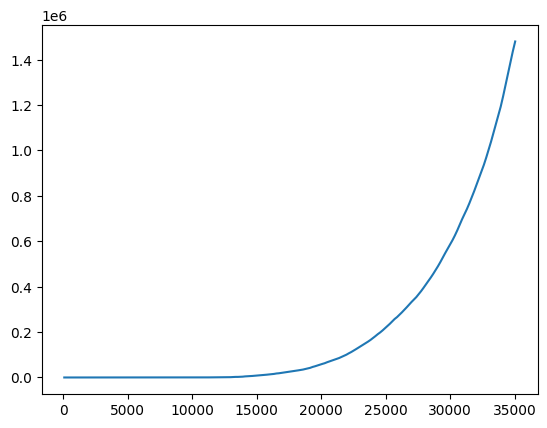

In [89]:
plt.plot(india['Confirmed'])

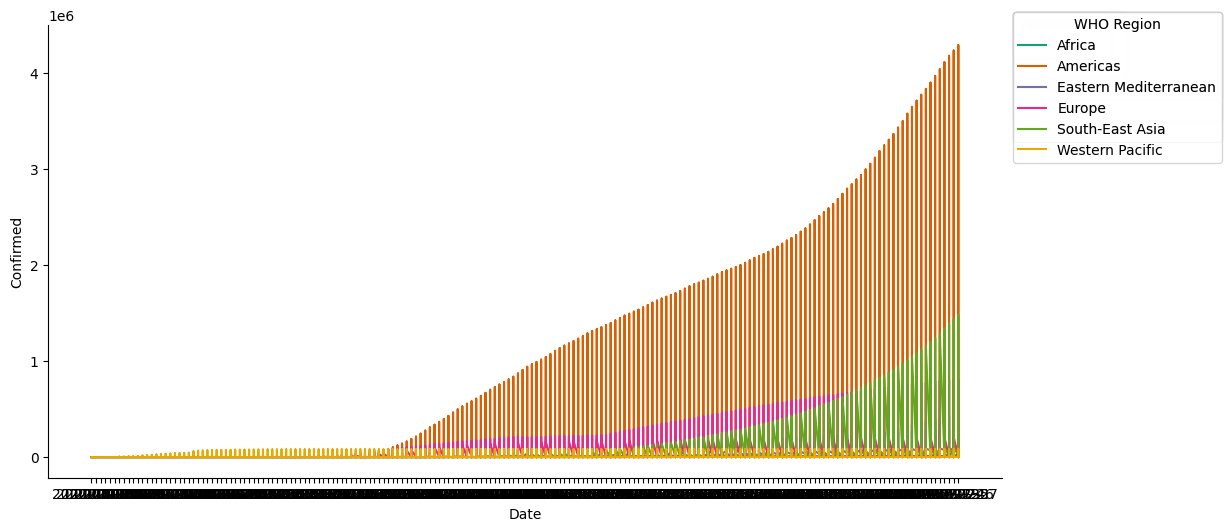

In [90]:
# @title Date vs Confirmed

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Confirmed']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WHO Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='WHO Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Confirmed')